<a href="https://colab.research.google.com/github/LUDIAA/Astro/blob/main/Ludia_454_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy import units as u
from gala.units import galactic

import gala.potential as gp

from astropy.coordinates import SkyCoord 
import astropy.coordinates as coord
from astropy.coordinates import Angle, Latitude, Longitude  # Angles

import matplotlib.patches as mpatches
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
plt.rc('font', **{'family':'Serif', 'size':14})


In [ ]:
r_min = 0
r_max = 20
r_total = np.linspace(r_min,r_max,num=100)
r_total

# for computing density 
x = np.copy(r_total)  
y = np.zeros_like(r_total)
z = np.zeros_like(r_total)

In [ ]:
## disk - Miyamoto Nagai
mw_a_disk = gp.MiyamotoNagaiPotential(m = 6.5e10*u.Msun, a = 3.5*u.kpc, b = 0.53*u.kpc, units=galactic) 
mw_b_disk = gp.MiyamotoNagaiPotential(m = 5.5e10*u.Msun, a = 3.5*u.kpc, b = 0.53*u.kpc, units=galactic)

## bulge - Hernquist 
mw_a_bulge = gp.HernquistPotential(m = 1e10*u.Msun, c = 0.7*u.kpc, units=galactic)
mw_b_bulge = gp.HernquistPotential(m = 1e10*u.Msun, c = 0.7*u.kpc, units=galactic)

## NFW - halo
mw_a_nfw_halo = gp.NFWPotential(m = 92.5e10*u.Msun,r_s = 26.47*u.kpc, units=galactic) 
mw_b_nfw_halo = gp.NFWPotential(m = 143.5e10*u.Msun,r_s = 31.27*u.kpc, units=galactic)  


def galaxy_pot(disk, bulge,halo):
    #disk: Miyamoto-nagai obj
    #bulge: Hurnquist obj
    #halo:  NFW obj
    galaxy_potential = gp.CCompositePotential()
    galaxy_potential['bulge'] = bulge
    galaxy_potential['halo'] = halo
    galaxy_potential['disk'] = disk
    return(galaxy_potential)

mw_a = galaxy_pot(mw_a_disk, mw_a_bulge, mw_a_nfw_halo) # total in galaxy
mw_b = galaxy_pot(mw_b_disk, mw_b_bulge, mw_b_nfw_halo)

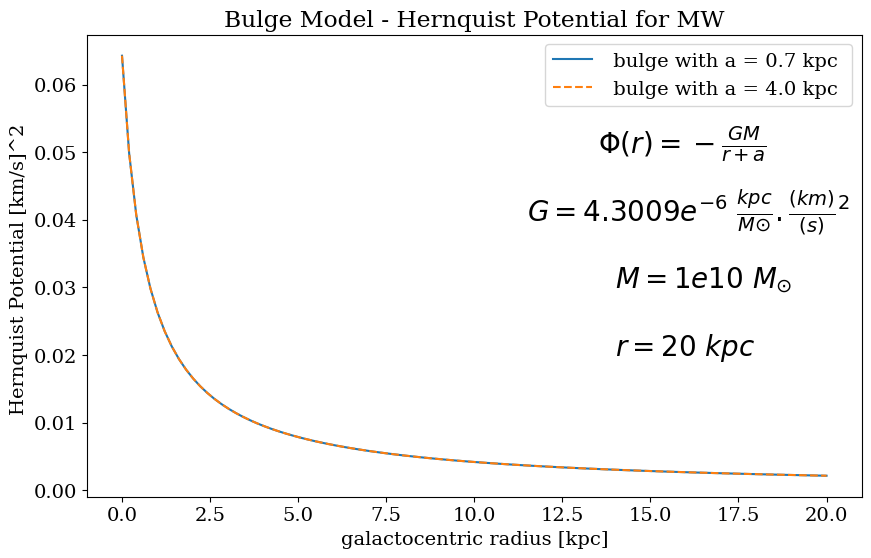

In [ ]:
#bulge_potential = mw_a_bulge
plt.figure(figsize=(10,6))
plt.plot(r_total, np.abs(mw_a_bulge.energy([x,y,z])),label= " bulge with a = 0.7 kpc ")
plt.plot(r_total, np.abs(mw_b_bulge.energy([x,y,z])),label= " bulge with a = 4.0 kpc ", ls ="--")
plt.xlabel("galactocentric radius [kpc]") 
plt.ylabel("Hernquist Potential [km/s]^2 ")
plt.title("Bulge Model - Hernquist Potential for MW")
plt.text(13.5,0.05,r"$\Phi (r)= - \frac {GM} {r+a}$", fontsize=20)
plt.text(11.5,0.04,r"$G = 4.3009e^{-6} ~\frac {kpc} {M{\odot}} . \frac{(km)}{(s)}^{2}$", fontsize=20) #kpc/m0(km/s)^2
plt.text(14,0.03,r"$M =1e10~M_{\odot}$",fontsize=20)
plt.text(14,0.02,r"$r = 20~ kpc $", fontsize = 20)
#plt.text(14,0.01,r"$a = 0.7~ kpc$", fontsize = 20) #a -> c
plt.legend()
#plt.xscale("log")
#plt.savefig("Bulge-Hernquist model",facecolor='white', edgecolor='auto')


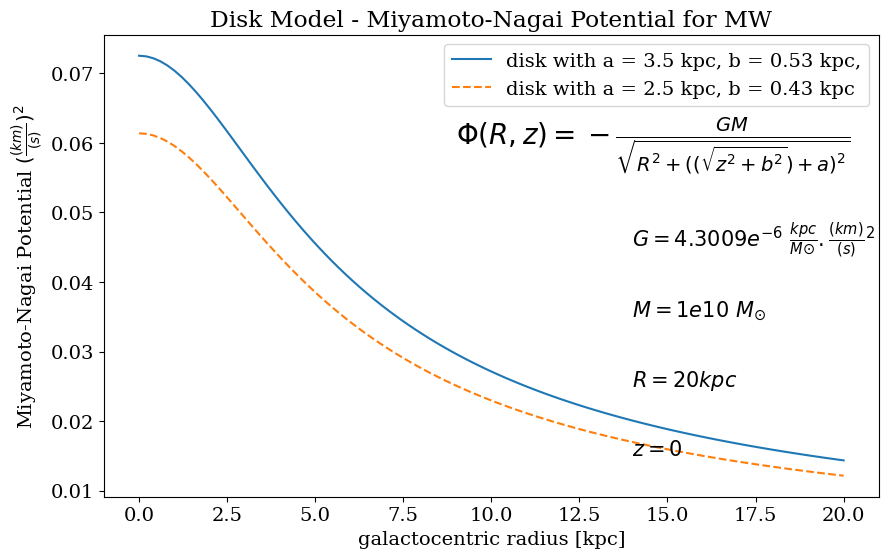

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(r_total,np.abs(mw_a_disk.energy([x,y,z])),label="disk with a = 3.5 kpc, b = 0.53 kpc,")
plt.plot(r_total,np.abs(mw_b_disk.energy([x,y,z])),label="disk with a = 2.5 kpc, b = 0.43 kpc ", ls="--")
plt.xlabel("galactocentric radius [kpc]") 
plt.ylabel(r"Miyamoto-Nagai Potential $(\frac {(km)}{(s)})^2 $")
plt.title("Disk Model - Miyamoto-Nagai Potential for MW")
plt.text(9,0.06,r"$\Phi (R,z)= - \frac {GM} {\sqrt{{R^2}+{((\sqrt{z^2+b^2})+a)^2}}}$",fontsize = 20)
plt.text(14,0.045,r"$G = 4.3009e^{-6}~\frac {kpc} {M{\odot}} . \frac{(km)}{(s)}^{2}$", fontsize=15)
plt.text(14,0.035,r"$M =1e10~M_{\odot}$",fontsize=15)
plt.text(14,0.025,r"$R = 20 kpc$",fontsize=15)
plt.text(14,0.015,r"$z = 0 $", fontsize=15)

plt.legend()
#plt.xscale("log")
#plt.savefig("Disk-MNagai model",facecolor='white', edgecolor='auto')

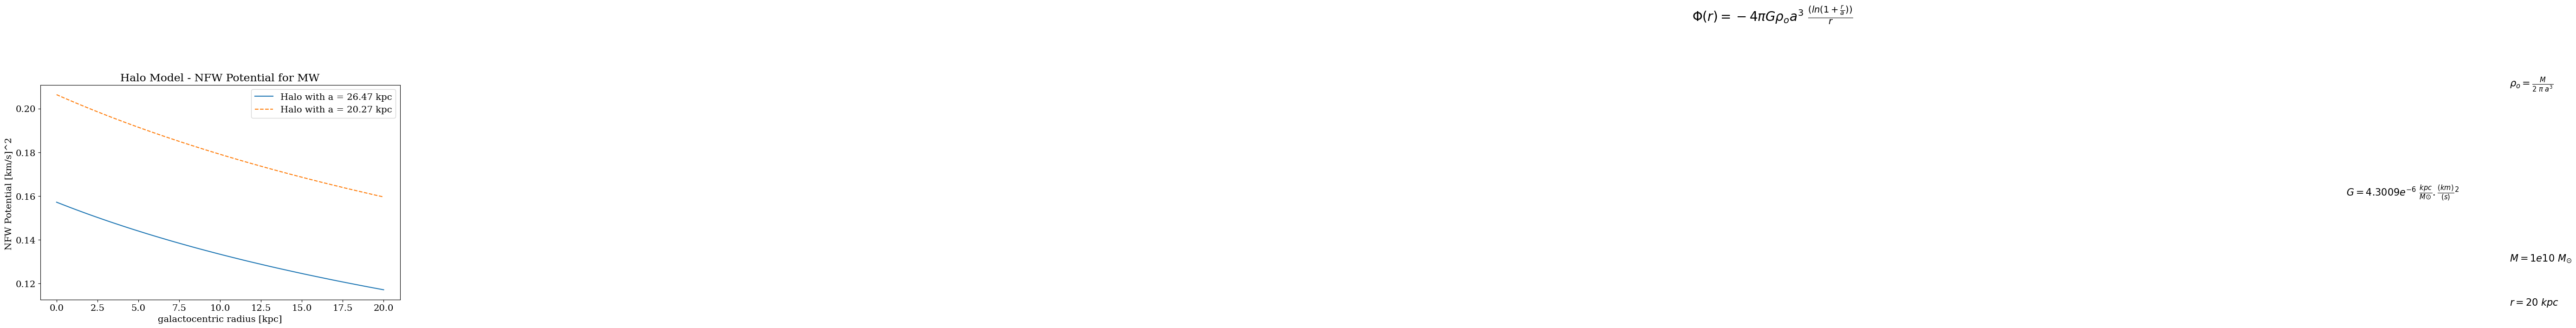

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x,np.abs(mw_a_nfw_halo.energy([x,y,z])),label="Halo with a = 26.47 kpc")
plt.plot(x,np.abs(mw_b_nfw_halo.energy([x,y,z])),label="Halo with a = 20.27 kpc", ls = "--")
plt.xlabel("galactocentric radius [kpc]") 
plt.ylabel("NFW Potential [km/s]^2 ")
plt.title("Halo Model - NFW Potential for MW")
plt.text(100,0.24,r"$\Phi (r)= - {4\pi G \rho_o a^3}~ \frac{(ln(1+ \frac{r}{a}))}{r}$",fontsize = 20)
plt.text(150,0.21,r"$\rho_o = \frac {M}{2~\pi~{a}^3}$",fontsize = 15)
plt.text(140,0.16,r"$G = 4.3009e^{-6}~\frac {kpc} {M{\odot}} . \frac{(km)}{(s)}^{2}$", fontsize=15)
plt.text(150,0.13,r"$M =1e10~M_{\odot}$",fontsize=15)
plt.text(150,0.11,r"$r = 20~ kpc $", fontsize = 15)
plt.legend()
#plt.xscale("log")
#plt.savefig("halo-NFW model", facecolor='white', edgecolor='auto')
        

/usr/local/lib/python3.10/dist-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 0.98, 'Circular Velocity Curve for each components of the MW')

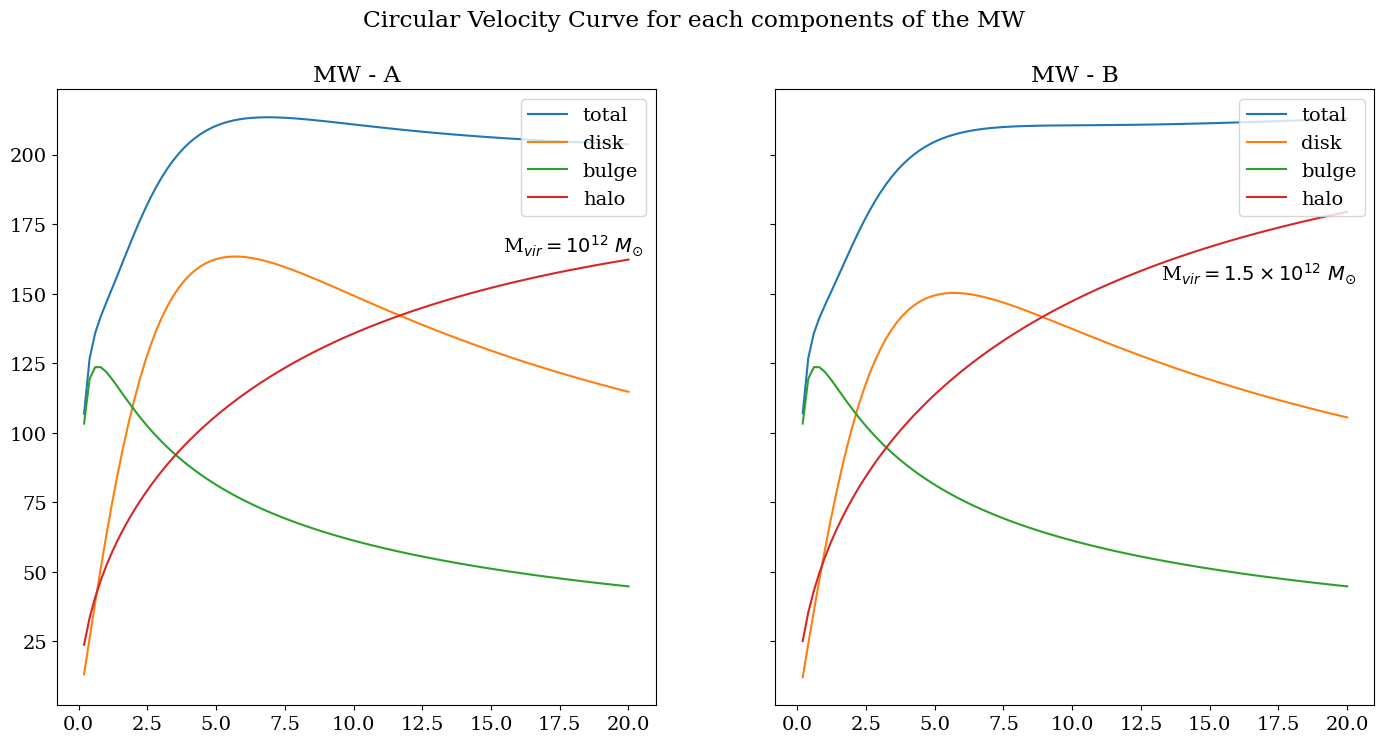

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True, figsize = (17,8))


axs[0].plot(r_total,mw_a.circular_velocity([x,y,z]),label="total")
axs[0].plot(r_total,mw_a_disk.circular_velocity([x,y,z]),label="disk")
axs[0].plot(r_total,mw_a_bulge.circular_velocity([x,y,z]),label="bulge")
axs[0].plot(r_total,mw_a_nfw_halo.circular_velocity([x,y,z]),label="halo")
axs[0].text(15.0,165,r"  M$_{vir} = 10^{12} ~M_{\odot}$")
axs[0].legend(loc='upper right')
axs[0].set_title('MW - A')

axs[1].plot(r_total,mw_b.circular_velocity([x,y,z]), label="total")
axs[1].plot(r_total,mw_b_disk.circular_velocity([x,y,z]), label="disk")
axs[1].plot(r_total,mw_b_bulge.circular_velocity([x,y,z]), label="bulge")
axs[1].plot(r_total,mw_b_nfw_halo.circular_velocity([x,y,z]), label="halo")
axs[1].text(13.0,155,r" M$_{vir} = 1.5\times10^{12} ~M_{\odot}$")
axs[1].legend(loc='upper right')
axs[1].set_title('MW - B')

plt.suptitle("Circular Velocity Curve for each components of the MW")
#plt.savefig("For Project")